# Projected Outcomes Sensitivity Analysis

This notebook contains the code for the sensitivty analysis of the projection model used to project outcomes under the 10x5 and 50x1 districting plans using demographic threshold inference model (see section 5 of the report).

The sensitivity analysis proceeds by altering the probabilities of the samplers. There are a total of 54 different scenarios, each detailed below. 

In [1]:
import pandas
import numpy
from collections import namedtuple
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import itertools

## Projection model

In [2]:
class ElectionSampler:
    cases = None
    threshold = None
    
    def decide_case(self, groups: pandas.Series):
        number_over_threshold = (groups > self.threshold).sum()
        return self.cases[number_over_threshold]

    def sample(self, groups: pandas.Series):
        """
        :param pandas.Series groups: a single row of a DataFrame with the percentages
            of each racial group in a ward.
        """
        outcomes, probabilities = self.decide_case(groups)
        outcome = numpy.random.choice(a=outcomes, p=probabilities)
        groups_from_highest_to_lowest = groups.sort_values(ascending=False).keys()
        full_outcome = itertools.chain(
            outcome,
            itertools.repeat(0, len(groups_from_highest_to_lowest) - len(outcome))
        )
        return pandas.Series(full_outcome, index=groups_from_highest_to_lowest)

class ElectionSamplerWithMajority(ElectionSampler):
    def decide_case(self, groups: pandas.Series):
        number_over_threshold = (groups > self.threshold).sum()
        any_majority = (groups > 0.5).any()
        if any_majority and number_over_threshold in self.cases["majority"]:
            return self.cases["majority"][number_over_threshold]
        else:
            return self.cases["plurality"][number_over_threshold]


In [3]:
Case = namedtuple("Case", ["outcomes", "probabilities"])

## Sampling classes
Each of the sampling classes below has been altered for the sensitivity analysis, with the first in each type being the control (the sampler used for the paper).

In [14]:
# Control
class FiftyByOneSampler_1(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "No change."

# Majority case 1 changes
class FiftyByOneSampler_2(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.8, 0.2)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25    
    change = "Majority, case 1 change: probabilities = (0.8, 0.2)"

class FiftyByOneSampler_3(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.7, 0.3)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25    
    change = "Majority, case 1 change: probabilities = (0.7, 0.3)"
    
class FiftyByOneSampler_4(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25    
    change = "Majority, case 1 change: probabilities = (0.6, 0.4)"

# Majority case 2 changes
class FiftyByOneSampler_5(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.16, 0.04))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.8, 0.16, 0.04)"

class FiftyByOneSampler_6(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.14, 0.06))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.8, 0.14, 0.06)"

class FiftyByOneSampler_7(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.75, 0.2, 0.05))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.75, 0.2, 0.05)"

class FiftyByOneSampler_8(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.7, 0.2, 0.1))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.7, 0.2, 0.1)"

# Plurality case 1 changes
class FiftyByOneSampler_9(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(0.9, 0.1)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 1 change: probablities = (0.9, 0.1)"

class FiftyByOneSampler_10(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(0.8, 0.2)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 1 change: probablities = (0.8, 0.2)"

# Plurality case 2 changes
class FiftyByOneSampler_11(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.55, 0.45)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.55, 0.45)"
    
class FiftyByOneSampler_12(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.5, 0.5)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.5, 0.5)"

class FiftyByOneSampler_13(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.45, 0.55)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.45, 0.55)"

class FiftyByOneSampler_14(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.4, 0.6)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.4, 0.6)"
    
class FiftyByOneSampler_15(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.65, 0.35)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.65, 0.35)"
    
class FiftyByOneSampler_16(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.7, 0.3)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.7, 0.3)"
    
# Plurality case 3 changes
class FiftyByOneSampler_17(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.5, 0.3, 0.2))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.5, 0.3, 0.2)"
    
class FiftyByOneSampler_18(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.55, 0.3, 0.15))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.55, 0.3, 0.15)"

class FiftyByOneSampler_19(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.4, 0.35, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.4, 0.35, 0.25)"

class FiftyByOneSampler_20(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.35, 0.2))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.45, 0.35, 0.2)"
    
fiftyxone = [FiftyByOneSampler_1(),
             FiftyByOneSampler_2(),
             FiftyByOneSampler_3(),
             FiftyByOneSampler_4(),
             FiftyByOneSampler_5(),
             FiftyByOneSampler_6(),
             FiftyByOneSampler_7(),
             FiftyByOneSampler_8(),
             FiftyByOneSampler_9(),
             FiftyByOneSampler_10(),
             FiftyByOneSampler_11(),
             FiftyByOneSampler_12(),
             FiftyByOneSampler_13(),
             FiftyByOneSampler_14(),
             FiftyByOneSampler_15(),
             FiftyByOneSampler_16(),
             FiftyByOneSampler_17(),
             FiftyByOneSampler_18(),
             FiftyByOneSampler_19(),
             FiftyByOneSampler_20()
            ]

In [25]:
# Control
class TenByFiveSampler_1(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "No change."

# Case 1 changes    
class TenByFiveSampler_2(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.6, 0.4)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 1 change: probabilities=(0.6, 0.4)"

class TenByFiveSampler_3(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.7, 0.3)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 1 change: probabilities=(0.7, 0.3)"

class TenByFiveSampler_4(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.4, 0.6)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 1 change: probabilities=(0.4, 0.6)"

class TenByFiveSampler_5(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.3, 0.7)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 1 change: probabilities=(0.3, 0.7)"
    
# Case 2 changes
class TenByFiveSampler_6(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.30, 0.50, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 2 change: probabilities = (0.30, 0.50, 0.1, 0.05, 0.05)"

class TenByFiveSampler_7(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.60, 0.05, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 2 change: probabilities = (0.25, 0.60, 0.05, 0.05, 0.05)"
    
class TenByFiveSampler_8(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.30, 0.55, 0.05, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 2 change: probabilities = (0.30, 0.55, 0.05, 0.05, 0.05)"

# Case 3 changes
class TenByFiveSampler_9(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.30, 0.25, 0.1, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 3 change: probabilities = (0.30, 0.25, 0.1, 0.2, 0.15)"

class TenByFiveSampler_10(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.35, 0.30, 0.1, 0.1, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 3 change: probabilities = (0.35, 0.30, 0.1, 0.1, 0.15)"
    
class TenByFiveSampler_11(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.30, 0.25, 0.15, 0.15, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 3 change: probabilities = (0.30, 0.25, 0.15, 0.15, 0.15)"

# Case 4 changes
class TenByFiveSampler_12(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.2, 0.15, 0.15))
    }
    threshold = 1/6
    change = "Case 4 change: probabilities = (0.25, 0.25, 0.2, 0.15, 0.15)"
    
class TenByFiveSampler_13(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.30, 0.25, 0.15, 0.15, 0.15))
    }
    threshold = 1/6
    change = "Case 4 change: probabilities = (0.30, 0.25, 0.15, 0.15, 0.15)"
    
class TenByFiveSampler_14(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.3, 0.2, 0.2, 0.2, 0.1))
    }
    threshold = 1/6
    change = "Case 4 change: probabilities = (0.30, 0.25, 0.15, 0.15, 0.15)"

tenxfive = [TenByFiveSampler_1(),
            TenByFiveSampler_2(),
            TenByFiveSampler_3(),
            TenByFiveSampler_4(),
            TenByFiveSampler_5(),
            TenByFiveSampler_6(),
            TenByFiveSampler_7(),
            TenByFiveSampler_8(),
            TenByFiveSampler_9(),
            TenByFiveSampler_10(),
            TenByFiveSampler_11(),
            TenByFiveSampler_12(),
            TenByFiveSampler_13(),
            TenByFiveSampler_14()
           ]

In [18]:
# Control
class TenByThreeSampler_1(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "No change."

# Majority case 1 changes
class TenByThreeSampler_2(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.8, 0.2)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 1 change: probablities = (0.8, 0.2)"

class TenByThreeSampler_3(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.7, 0.3)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 1 change: probablities = (0.7, 0.3)"
    
class TenByThreeSampler_4(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.6, 0.4)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 1 change: probablities = (0.6, 0.4)"

class TenByThreeSampler_5(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.5, 0.5)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 1 change: probablities = (0.5, 0.5)"
    
# Majority case 2 changes
class TenByThreeSampler_6(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.3, 0.7)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.3, 0.7)"

class TenByThreeSampler_7(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.4, 0.6)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.4, 0.6)"
    
class TenByThreeSampler_8(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.5, 0.5)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.5, 0.5)"

# Majority case 3 changes
class TenByThreeSampler_9(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.2, 0.4, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 3 change: probablities = (0.2, 0.4, 0.3, 0.1)"
    
class TenByThreeSampler_10(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.2, 0.5, 0.2, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 3 change: probablities = (0.2, 0.5, 0.2, 0.1)"

class TenByThreeSampler_11(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.4, 0.3, 0.2)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 3 change: probablities = (0.1, 0.4, 0.3, 0.2)"
    
class TenByThreeSampler_12(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.2, 0.4, 0.2, 0.2)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 3 change: probablities = (0.2, 0.4, 0.2, 0.2)"
    
# Plurality case 1 changes
class TenByThreeSampler_13(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.6, 0.4)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Plurality, case 1 change: probablities = (0.6, 0.4)"
    
class TenByThreeSampler_14(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.4, 0.6)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Plurality, case 1 change: probablities = (0.4, 0.6)"
    
class TenByThreeSampler_15(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.15, 0.5, 0.25, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.15, 0.5, 0.25, 0.1)"
    
class TenByThreeSampler_16(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.2, 0.4, 0.2, 0.2)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.2, 0.4, 0.2, 0.2)"
    
class TenByThreeSampler_17(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.2, 0.2)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.1, 0.5, 0.2, 0.2)"

# Plurality case 3 changes
class TenByThreeSampler_18(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.15, 0.1, 0.65))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.1, 0.15, 0.1, 0.65)"

class TenByThreeSampler_19(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.2, 0.1, 0.65))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.05, 0.2, 0.1, 0.65)"
    
class TenByThreeSampler_20(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.15, 0.65))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.05, 0.15, 0.15, 0.65)"
    
tenxthree = [TenByThreeSampler_1(),
             TenByThreeSampler_2(),
             TenByThreeSampler_3(),
             TenByThreeSampler_4(),
             TenByThreeSampler_5(),
             TenByThreeSampler_6(),
             TenByThreeSampler_7(),
             TenByThreeSampler_8(),
             TenByThreeSampler_9(),
             TenByThreeSampler_10(),
             TenByThreeSampler_11(),
             TenByThreeSampler_12(),
             TenByThreeSampler_13(),
             TenByThreeSampler_14(),
             TenByThreeSampler_15(),
             TenByThreeSampler_16(),
             TenByThreeSampler_17(),
             TenByThreeSampler_18(),
             TenByThreeSampler_19(),
             TenByThreeSampler_20()
            ]

In [7]:
def load_data(filename):
    df = pandas.read_csv(filename)
    data = pandas.DataFrame(
        {
            "step": df["step"],
            "ward": df["ward"],
            "White": df["NH_WHITE"] / df["TOTPOP"],
            "Black": df["NH_BLACK"] / df["TOTPOP"],
            "Hispanic": df["HISP"] / df["TOTPOP"],
            "Asian": df["NH_ASIAN"] / df["TOTPOP"],
        }
    )
    return data

## Generating the projections

In [8]:
def random_sample(data, size, sampler):
    # Print the sample specification changes
    print()
    print("----------------------------------------------------------")
    print(sampler.change)
    print("----------------------------------------------------------")
    
    all_plans = {step: data.loc[indices] for step, indices in data.groupby("step").groups.items()}
    groups = ["White", "Black", "Hispanic", "Asian"]
    plan_indices = data["step"].unique()
    
    for plan_index in tqdm(numpy.random.choice(plan_indices, size=size)):
        wards = all_plans[plan_index]
        yield wards[groups].apply(sampler.sample, axis=1).sum()

In [9]:
groups = ["Asian", "Black", "Hispanic", "White"]

In [10]:
# Load in the data
prec50 = load_data("../ensembles/prec50/results.csv")
prec10 = load_data("../ensembles/prec10/results.csv")
ca10 = load_data("../ensembles/ca10/results.csv")

## Generate projections for every sample specification

In [11]:
num_samples = 10000
fiftyxone_results = []
tenxfive_results = []
tenxthree_results = []


-------------------------------
FiftyByOne sensitivity analysis
-------------------------------

----------------------------------------------------------
No change.
----------------------------------------------------------


100%|██████████| 10000/10000 [13:17<00:00, 12.54it/s]


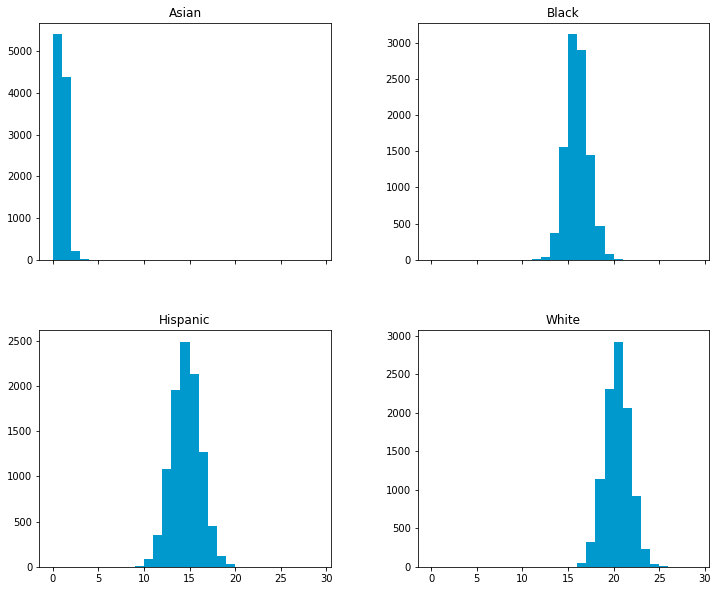


Results:

Asian        0.4799
Black       15.5114
Hispanic    14.1101
White       19.8986
dtype: float64

----------------------------------------------------------
Majority, case 1 change: probabilities = (0.8, 0.2)
----------------------------------------------------------


100%|██████████| 10000/10000 [13:41<00:00, 11.90it/s]


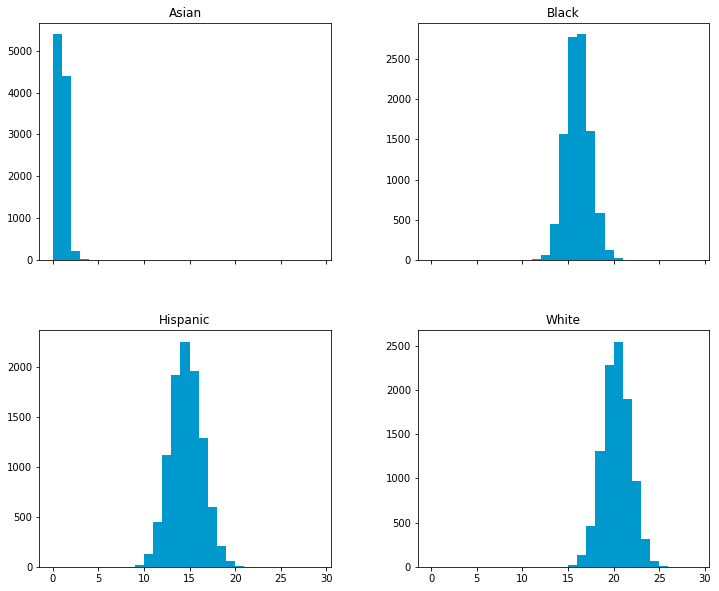


Results:

Asian        0.4806
Black       15.5695
Hispanic    14.1389
White       19.8110
dtype: float64

----------------------------------------------------------
Majority, case 1 change: probabilities = (0.7, 0.3)
----------------------------------------------------------


100%|██████████| 10000/10000 [13:52<00:00, 11.95it/s]


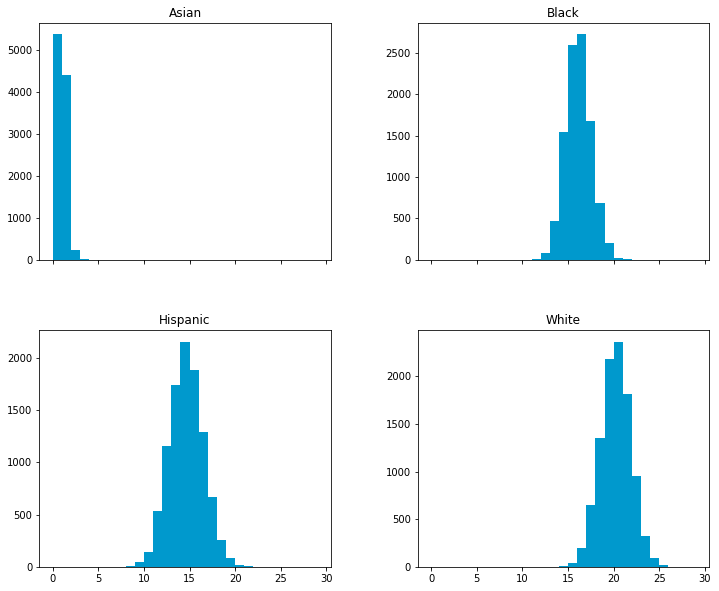


Results:

Asian        0.4873
Black       15.6263
Hispanic    14.1547
White       19.7317
dtype: float64

----------------------------------------------------------
Majority, case 1 change: probabilities = (0.6, 0.4)
----------------------------------------------------------


100%|██████████| 10000/10000 [29:13<00:00,  5.70it/s]


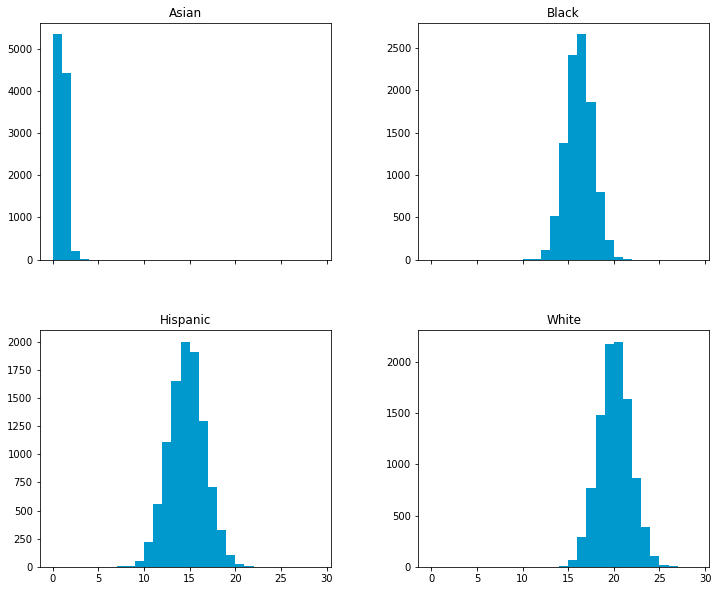


Results:

Asian        0.4872
Black       15.7103
Hispanic    14.1961
White       19.6064
dtype: float64

----------------------------------------------------------
Majority, case 2 change: probablities = (0.8, 0.16, 0.04)
----------------------------------------------------------


100%|██████████| 10000/10000 [13:18<00:00, 12.69it/s]


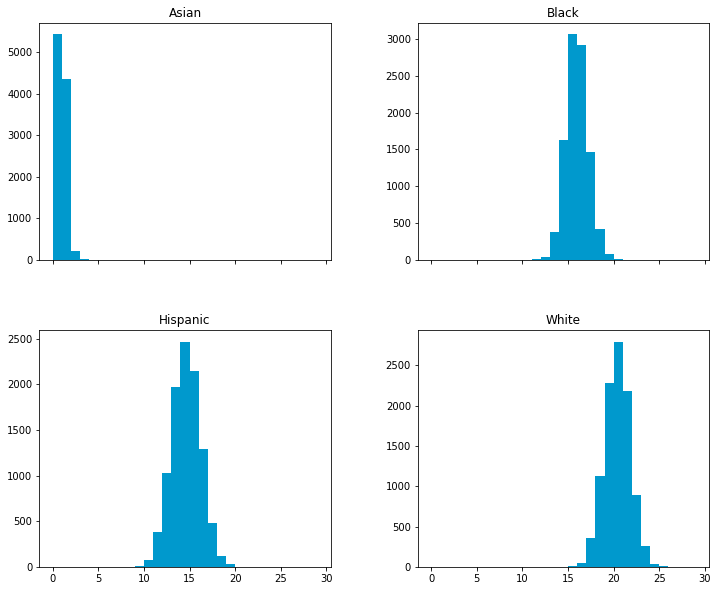


Results:

Asian        0.4786
Black       15.4929
Hispanic    14.1221
White       19.9064
dtype: float64

----------------------------------------------------------
Majority, case 2 change: probablities = (0.8, 0.14, 0.06)
----------------------------------------------------------


100%|██████████| 10000/10000 [13:19<00:00, 12.51it/s]


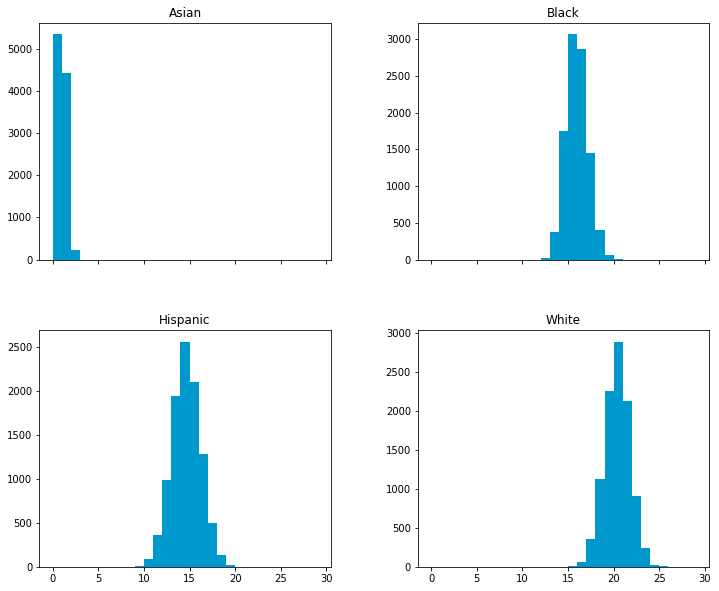


Results:

Asian        0.4869
Black       15.4778
Hispanic    14.1400
White       19.8953
dtype: float64

----------------------------------------------------------
Majority, case 2 change: probablities = (0.75, 0.2, 0.05)
----------------------------------------------------------


100%|██████████| 10000/10000 [13:20<00:00, 12.64it/s]


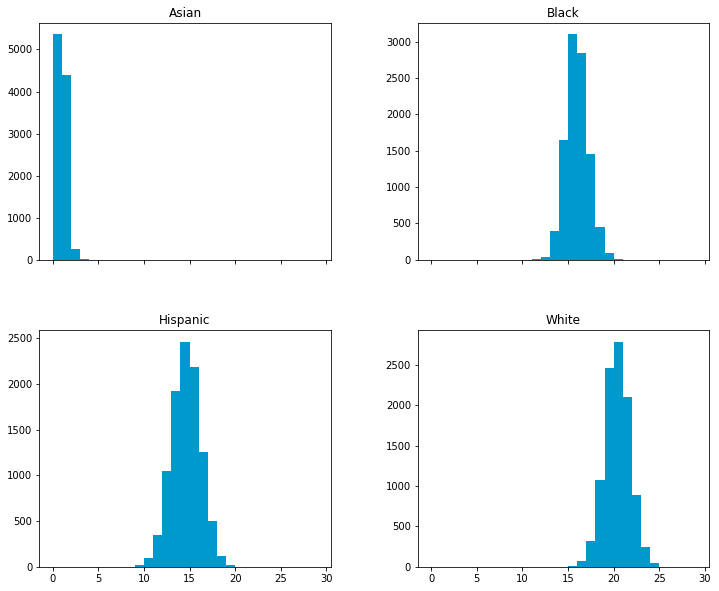


Results:

Asian        0.4895
Black       15.4913
Hispanic    14.1234
White       19.8958
dtype: float64

----------------------------------------------------------
Majority, case 2 change: probablities = (0.7, 0.2, 0.1)
----------------------------------------------------------


100%|██████████| 10000/10000 [13:20<00:00, 12.66it/s]


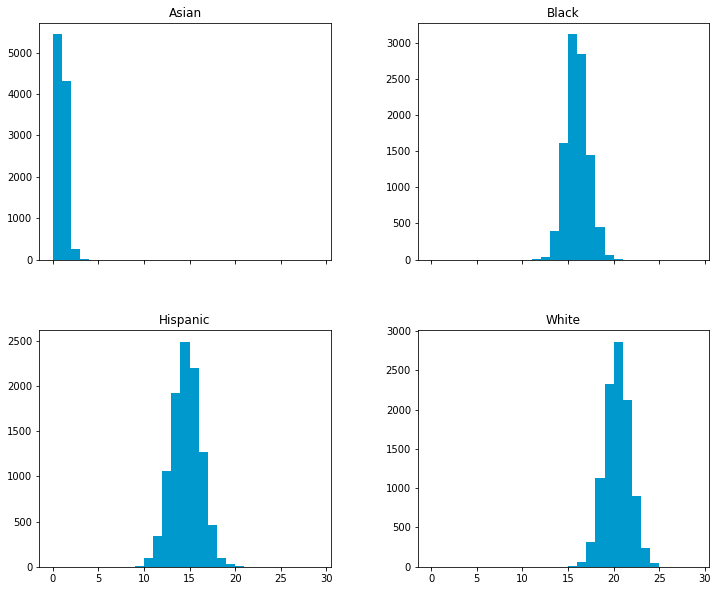


Results:

Asian        0.4812
Black       15.4940
Hispanic    14.1249
White       19.8999
dtype: float64

----------------------------------------------------------
Plurality, case 1 change: probablities = (0.9, 0.1)
----------------------------------------------------------


100%|██████████| 10000/10000 [13:22<00:00, 12.28it/s]


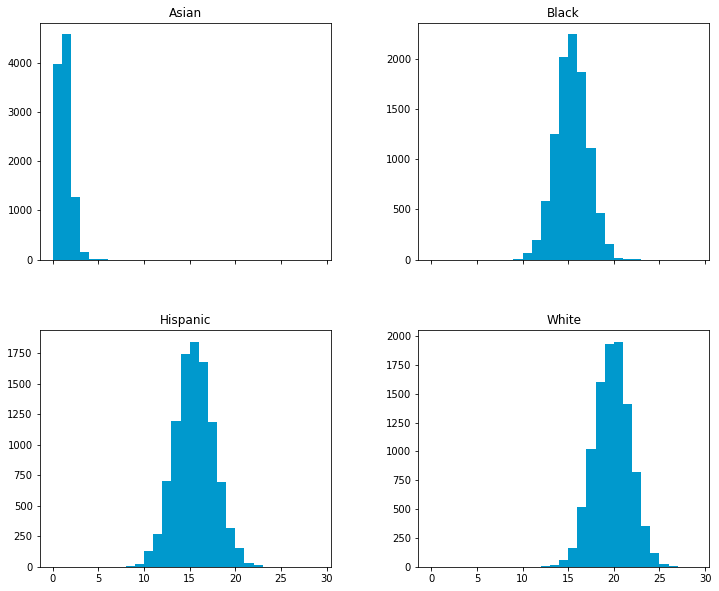


Results:

Asian        0.7637
Black       14.8824
Hispanic    15.0316
White       19.3223
dtype: float64

----------------------------------------------------------
Plurality, case 1 change: probablities = (0.8, 0.2)
----------------------------------------------------------


100%|██████████| 10000/10000 [21:32<00:00, 12.64it/s]


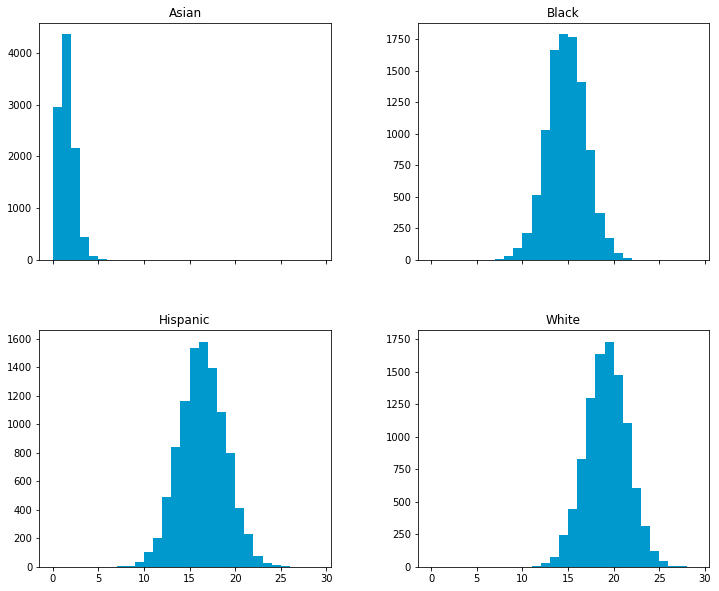


Results:

Asian        1.0297
Black       14.3138
Hispanic    15.9346
White       18.7219
dtype: float64

----------------------------------------------------------
Plurality, case 2 change: probablities = (0.55, 0.45)
----------------------------------------------------------


100%|██████████| 10000/10000 [19:44<00:00,  6.48it/s]


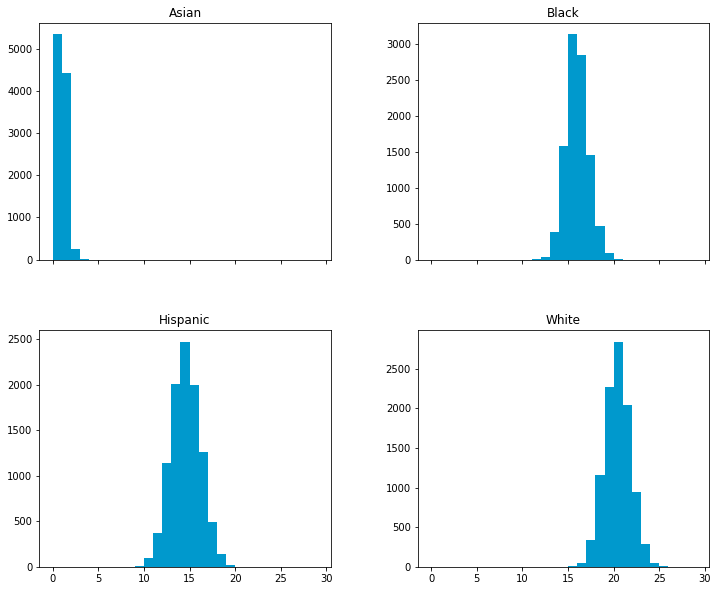


Results:

Asian        0.4919
Black       15.5111
Hispanic    14.0850
White       19.9120
dtype: float64

----------------------------------------------------------
Plurality, case 2 change: probablities = (0.5, 0.5)
----------------------------------------------------------


100%|██████████| 10000/10000 [1:19:04<00:00,  2.11it/s]


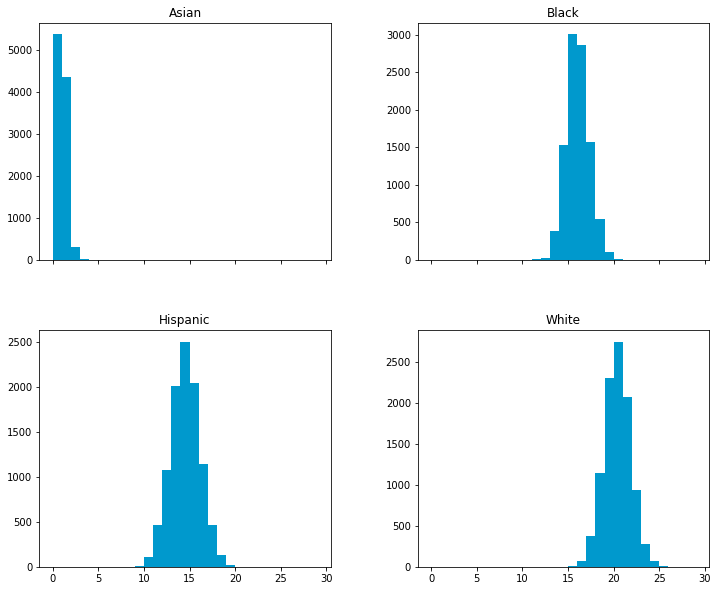


Results:

Asian        0.4953
Black       15.5683
Hispanic    14.0365
White       19.8999
dtype: float64

----------------------------------------------------------
Plurality, case 2 change: probablities = (0.45, 0.55)
----------------------------------------------------------


100%|██████████| 10000/10000 [14:21<00:00,  9.55it/s]


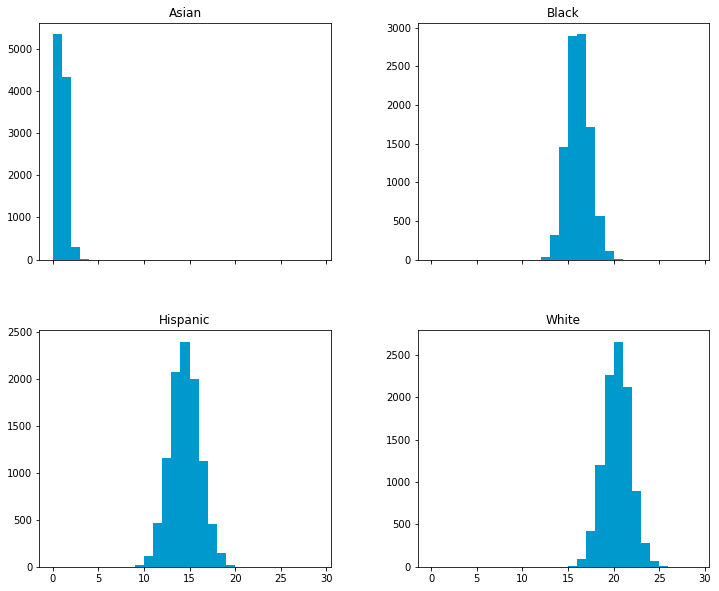


Results:

Asian        0.4990
Black       15.6338
Hispanic    13.9928
White       19.8744
dtype: float64

----------------------------------------------------------
Plurality, case 2 change: probablities = (0.4, 0.6)
----------------------------------------------------------


100%|██████████| 10000/10000 [13:43<00:00, 12.15it/s]


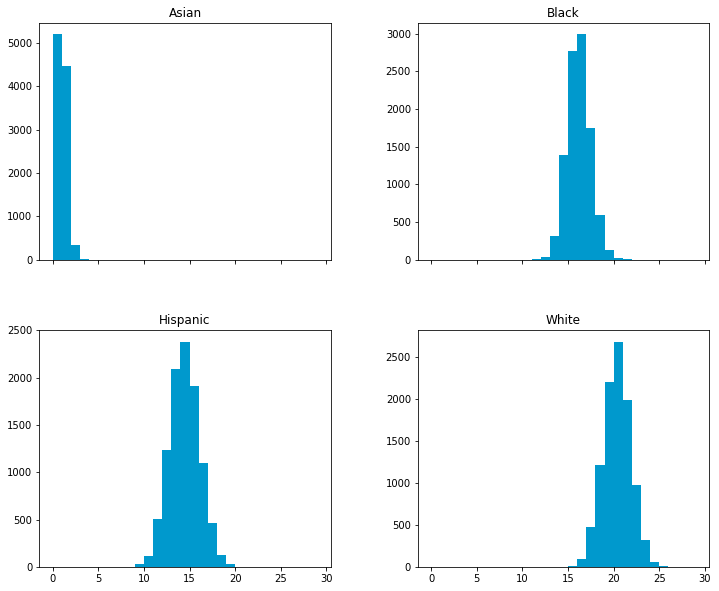


Results:

Asian        0.5147
Black       15.6810
Hispanic    13.9408
White       19.8635
dtype: float64

----------------------------------------------------------
Plurality, case 2 change: probablities = (0.65, 0.35)
----------------------------------------------------------


100%|██████████| 10000/10000 [14:00<00:00, 12.40it/s]


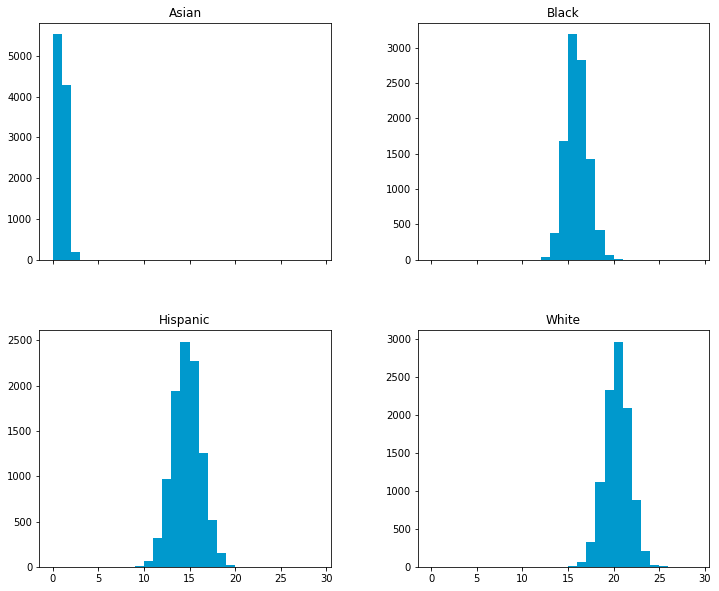


Results:

Asian        0.4657
Black       15.4630
Hispanic    14.1904
White       19.8809
dtype: float64

----------------------------------------------------------
Plurality, case 2 change: probablities = (0.7, 0.3)
----------------------------------------------------------


100%|██████████| 10000/10000 [14:14<00:00, 11.70it/s]


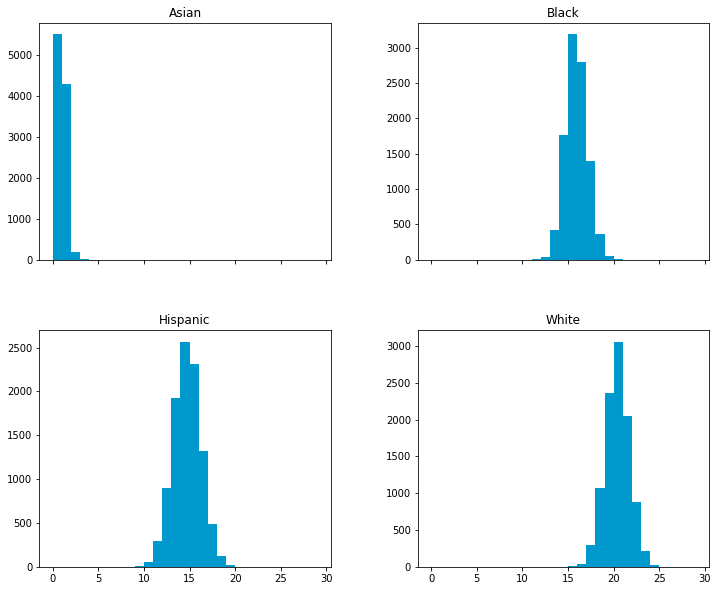


Results:

Asian        0.4672
Black       15.4178
Hispanic    14.2163
White       19.8987
dtype: float64

----------------------------------------------------------
Plurality, case 3 change: probablities = (0.5, 0.3, 0.3)
----------------------------------------------------------


  0%|          | 2/10000 [00:00<15:36, 10.67it/s]


ValueError: ('probabilities do not sum to 1', 'occurred at index 240069')

In [12]:
# FiftyByOne
print()
print("-------------------------------")
print("FiftyByOne sensitivity analysis")
print("-------------------------------")
data = prec50
for sampler in fiftyxone:
    # Sample
    outcomes = pandas.DataFrame.from_records(random_sample(data, num_samples, sampler))
    outcomes.groupby(groups).size()
    # Plot the results
    outcomes[groups].hist(sharex=True, grid=False, figsize=(12,10), color="#0099cd", bins=list(range(30)))
    plt.show()
    print()
    # Compute statistics for the projected outcomes
    results = outcomes.mean()
    fiftyxone_results.append(results)
    print("Results:")
    print()
    print(results)

TenByFive sensitivity analysis

----------------------------------------------------------
Case 3 change: probabilities = (0.30, 0.25, 0.1, 0.2, 0.15)
----------------------------------------------------------


100%|██████████| 10000/10000 [02:40<00:00, 65.44it/s]


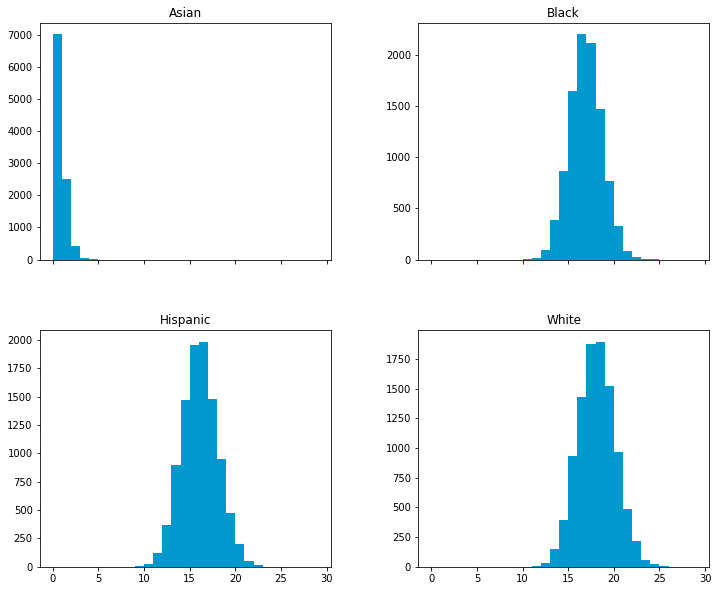


Results:

Asian        0.3491
Black       16.4277
Hispanic    15.6103
White       17.6129
dtype: float64

----------------------------------------------------------
Case 3 change: probabilities = (0.35, 0.30, 0.1, 0.1, 0.15)
----------------------------------------------------------


100%|██████████| 10000/10000 [02:49<00:00, 59.16it/s]


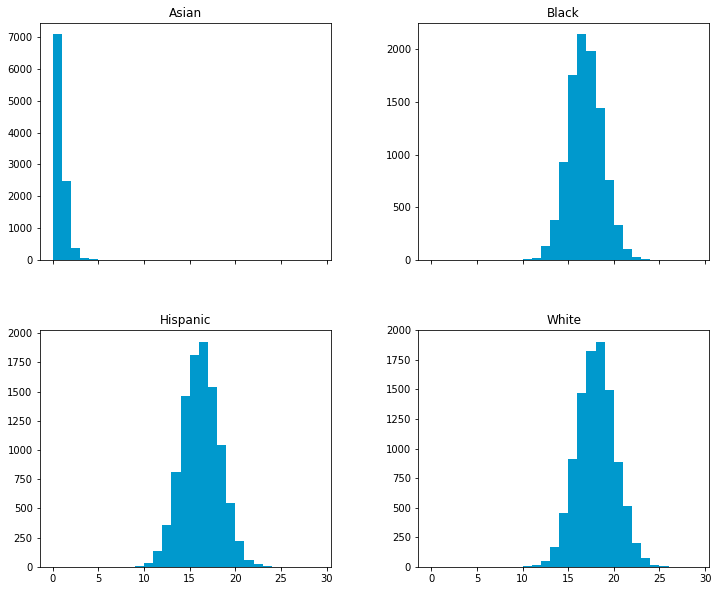


Results:

Asian        0.3413
Black       16.3801
Hispanic    15.7151
White       17.5635
dtype: float64

----------------------------------------------------------
Case 3 change: probabilities = (0.30, 0.25, 0.15, 0.15, 0.15)
----------------------------------------------------------


100%|██████████| 10000/10000 [02:54<00:00, 57.23it/s]


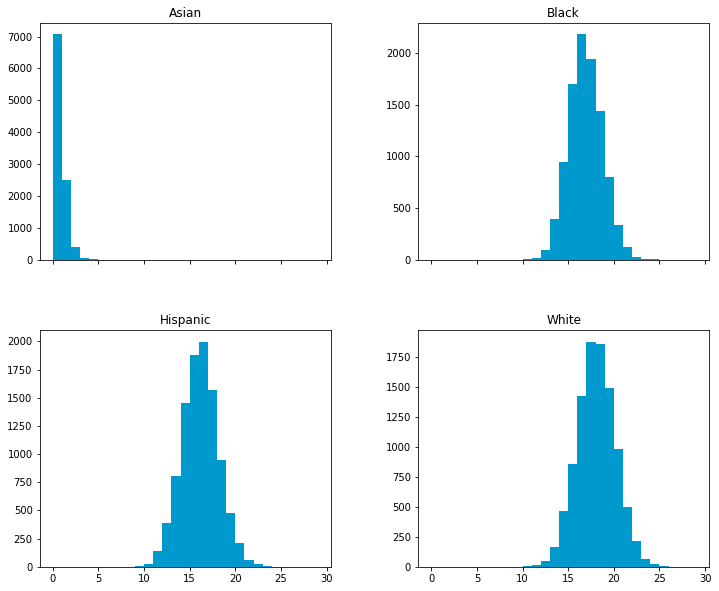


Results:

Asian        0.3428
Black       16.4142
Hispanic    15.6537
White       17.5893
dtype: float64

----------------------------------------------------------
Case 4 change: probabilities = (0.25, 0.25, 0.2, 0.15, 0.15)
----------------------------------------------------------


100%|██████████| 10000/10000 [02:42<00:00, 61.43it/s]


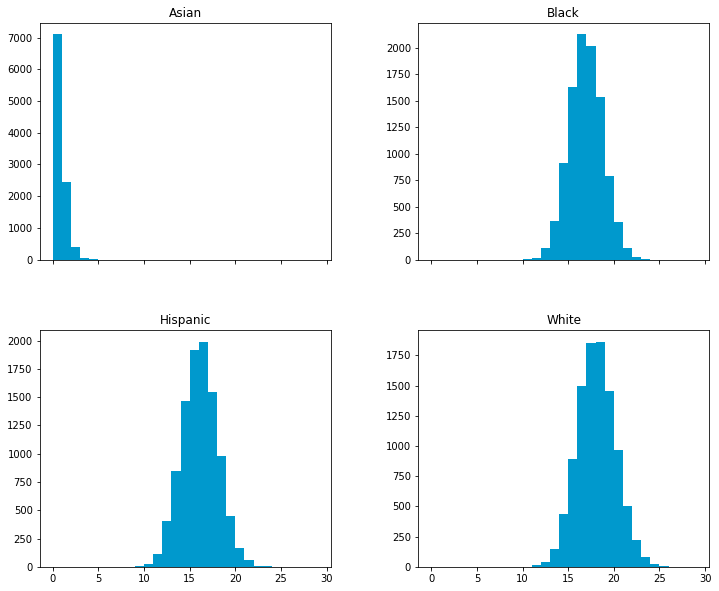


Results:

Asian        0.3399
Black       16.4478
Hispanic    15.6100
White       17.6023
dtype: float64

----------------------------------------------------------
Case 4 change: probabilities = (0.30, 0.25, 0.15, 0.15, 0.15)
----------------------------------------------------------


100%|██████████| 10000/10000 [02:40<00:00, 66.35it/s]


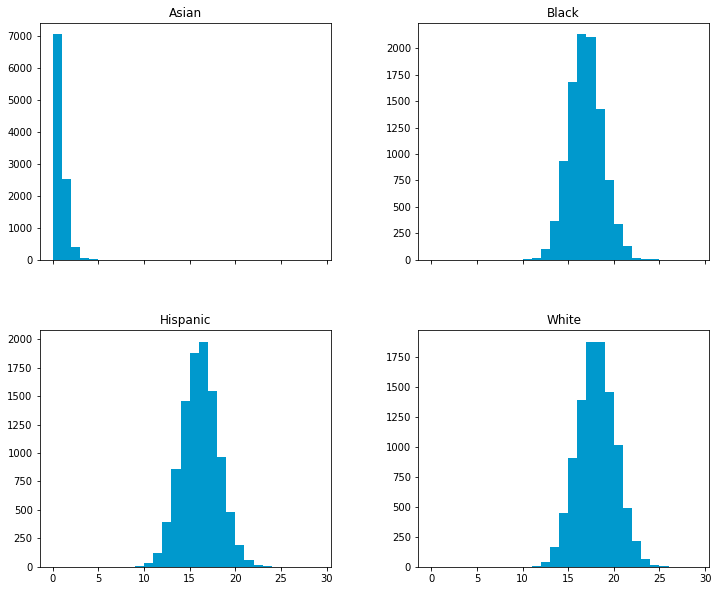


Results:

Asian        0.3458
Black       16.4207
Hispanic    15.6353
White       17.5982
dtype: float64

----------------------------------------------------------
Case 4 change: probabilities = (0.30, 0.25, 0.15, 0.15, 0.15)
----------------------------------------------------------


100%|██████████| 10000/10000 [02:40<00:00, 62.16it/s]


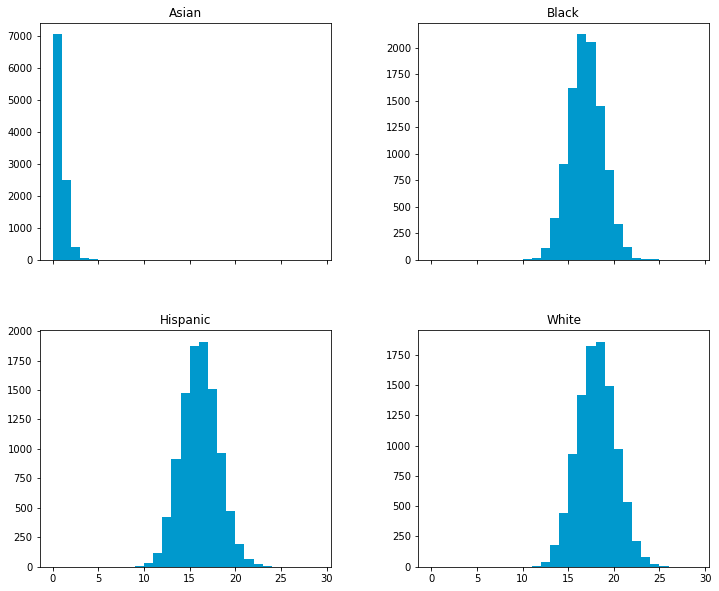


Results:

Asian        0.3478
Black       16.4494
Hispanic    15.5991
White       17.6037
dtype: float64


In [23]:
# TenByFive
print("TenByFive sensitivity analysis")
data = prec10
for sampler in tenxfive:
    # Sample
    outcomes = pandas.DataFrame.from_records(random_sample(data, num_samples, sampler))
    outcomes.groupby(groups).size()
    # Plot the results
    outcomes[groups].hist(sharex=True, grid=False, figsize=(12,10), color="#0099cd", bins=list(range(30)))
    plt.show()
    print()
    # Compute statistics for the projected outcomes
    results = outcomes.mean()
    tenxfive_results.append(results)
    print("Results:")
    print()
    print(results)

TenByThree sensitivity analysis

----------------------------------------------------------
No change.
----------------------------------------------------------


100%|██████████| 10000/10000 [03:18<00:00, 50.29it/s]


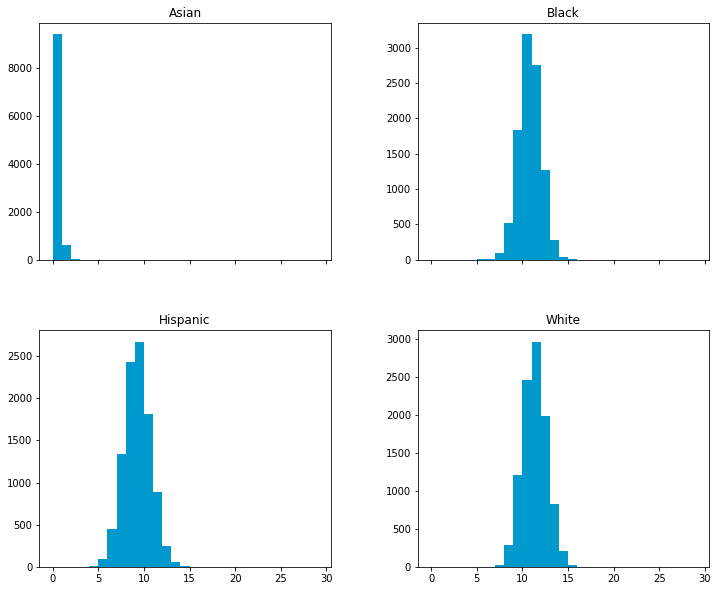


Results:

Asian        0.0620
Black       10.3096
Hispanic     8.7718
White       10.8566
dtype: float64

----------------------------------------------------------
Majority, case 1 change: probablities = (0.8, 0.2)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:16<00:00, 50.81it/s]


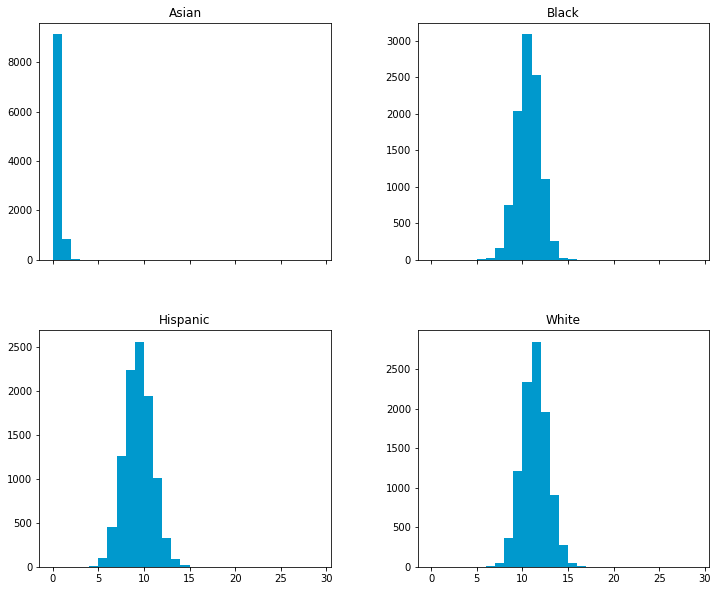


Results:

Asian        0.0884
Black       10.1517
Hispanic     8.8865
White       10.8734
dtype: float64

----------------------------------------------------------
Majority, case 1 change: probablities = (0.7, 0.3)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:21<00:00, 49.61it/s]


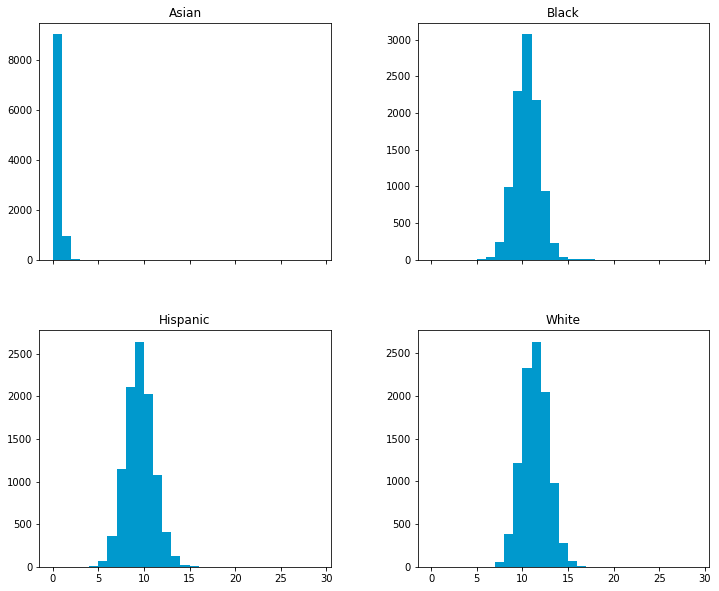


Results:

Asian        0.0985
Black        9.9737
Hispanic     9.0255
White       10.9023
dtype: float64

----------------------------------------------------------
Majority, case 1 change: probablities = (0.6, 0.4)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:22<00:00, 47.15it/s]


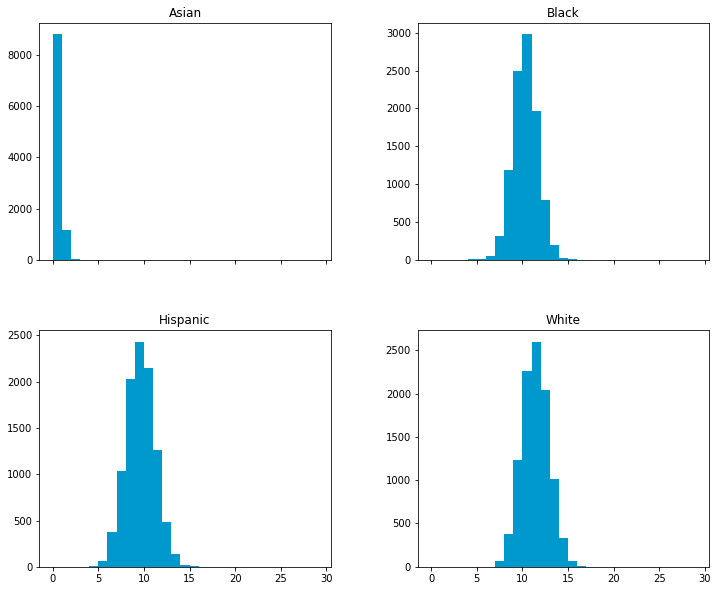


Results:

Asian        0.1203
Black        9.8231
Hispanic     9.1324
White       10.9242
dtype: float64

----------------------------------------------------------
Majority, case 1 change: probablities = (0.5, 0.5)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:23<00:00, 49.12it/s]


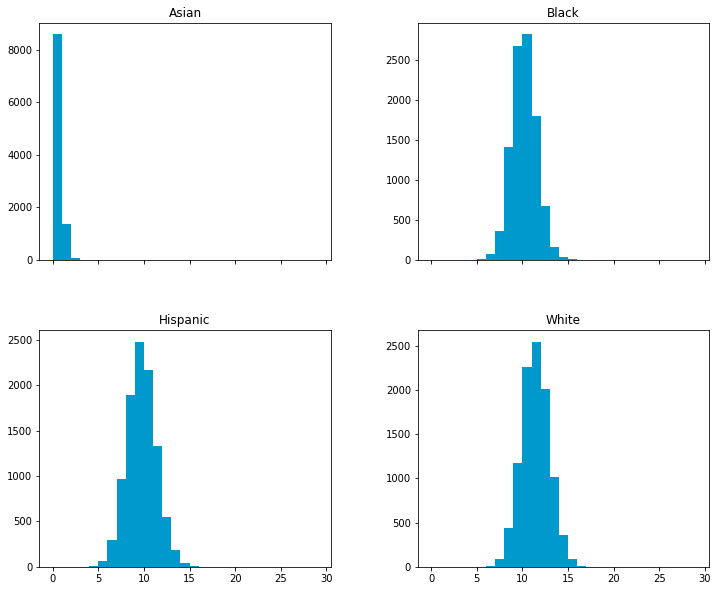


Results:

Asian        0.1458
Black        9.6874
Hispanic     9.2453
White       10.9215
dtype: float64

----------------------------------------------------------
Majority, case 2 change: probablities = (0.3, 0.7)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:19<00:00, 50.20it/s]


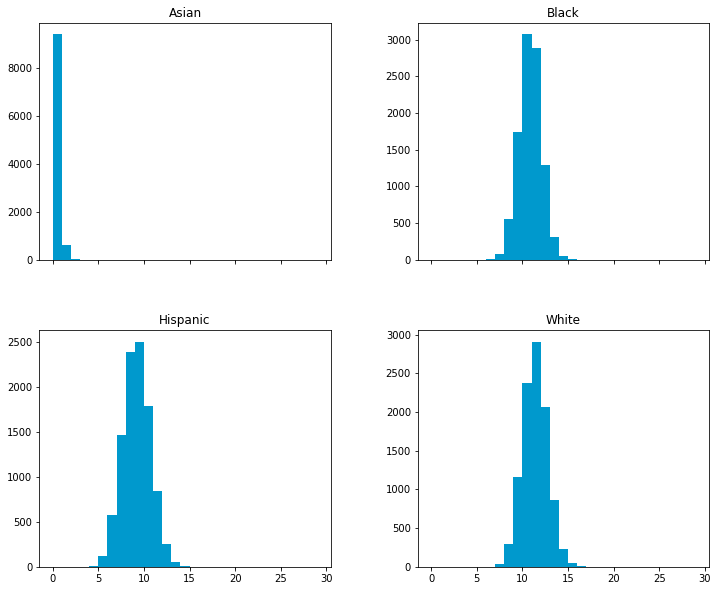


Results:

Asian        0.0631
Black       10.3454
Hispanic     8.6919
White       10.8996
dtype: float64

----------------------------------------------------------
Majority, case 2 change: probablities = (0.4, 0.6)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:19<00:00, 50.04it/s]


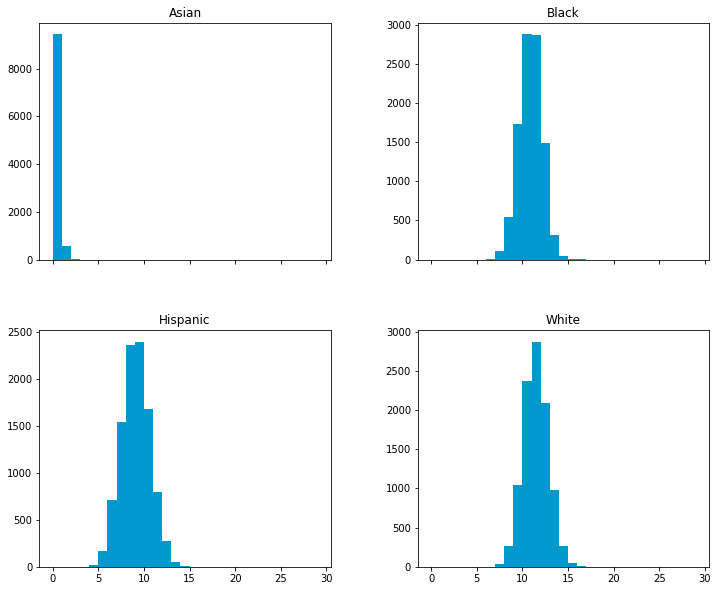


Results:

Asian        0.0576
Black       10.3843
Hispanic     8.5955
White       10.9626
dtype: float64

----------------------------------------------------------
Majority, case 2 change: probablities = (0.5, 0.5)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:22<00:00, 49.39it/s]


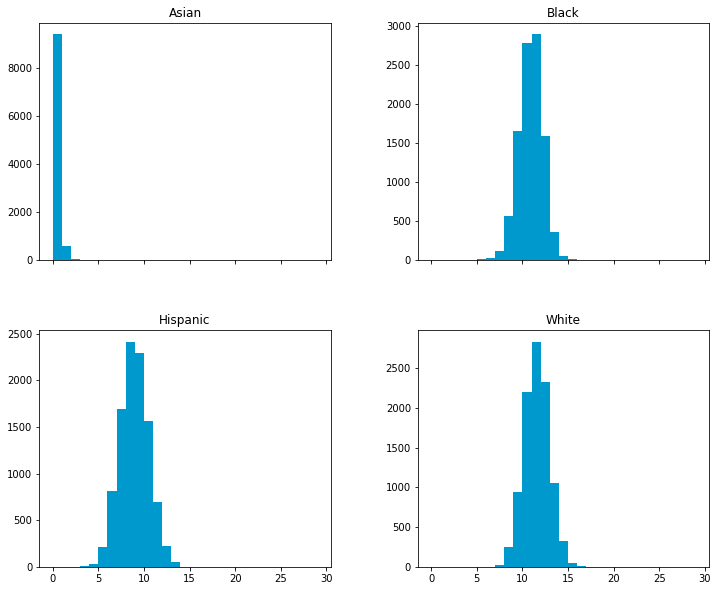


Results:

Asian        0.0593
Black       10.4189
Hispanic     8.4517
White       11.0701
dtype: float64

----------------------------------------------------------
Majority, case 3 change: probablities = (0.2, 0.4, 0.3, 0.1)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:19<00:00, 50.02it/s]


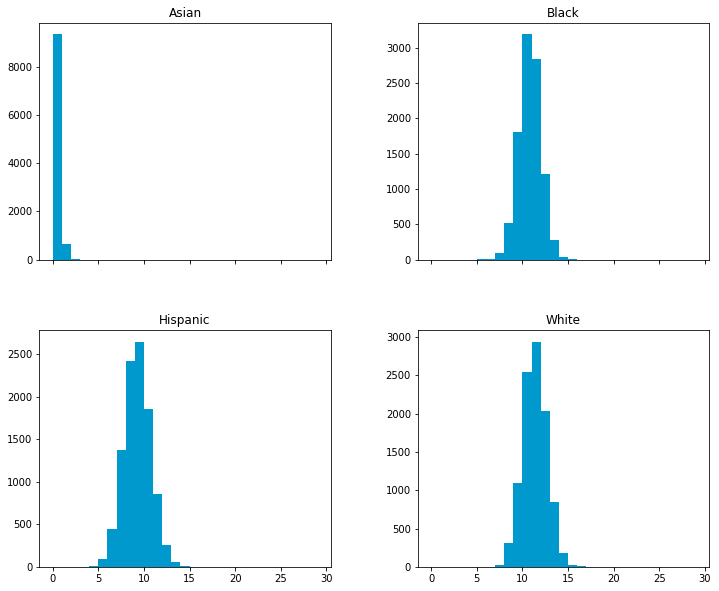


Results:

Asian        0.0646
Black       10.3068
Hispanic     8.7699
White       10.8587
dtype: float64

----------------------------------------------------------
Majority, case 3 change: probablities = (0.2, 0.5, 0.2, 0.1)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:17<00:00, 50.79it/s]


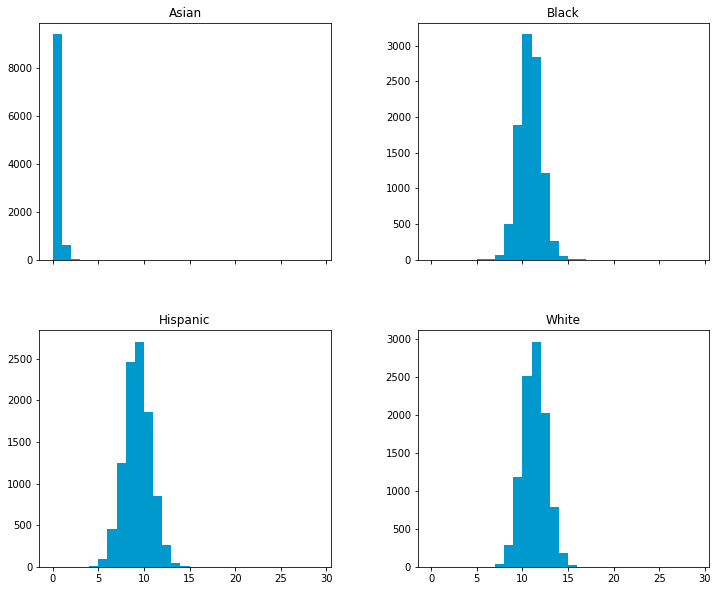


Results:

Asian        0.0635
Black       10.3122
Hispanic     8.7856
White       10.8387
dtype: float64

----------------------------------------------------------
Majority, case 3 change: probablities = (0.1, 0.4, 0.3, 0.2)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:08<00:00, 53.11it/s]


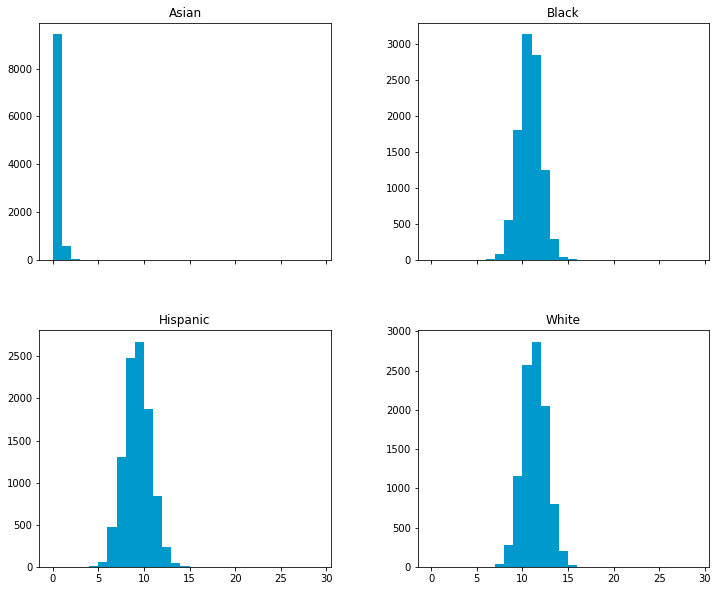


Results:

Asian        0.0583
Black       10.3167
Hispanic     8.7722
White       10.8528
dtype: float64

----------------------------------------------------------
Majority, case 3 change: probablities = (0.2, 0.4, 0.2, 0.2)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:21<00:00, 49.67it/s]


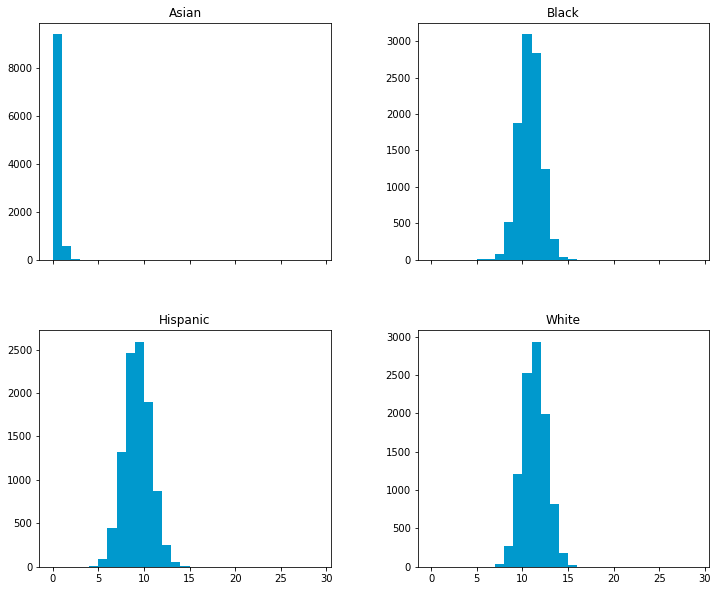


Results:

Asian        0.0599
Black       10.3188
Hispanic     8.7804
White       10.8409
dtype: float64

----------------------------------------------------------
Plurality, case 1 change: probablities = (0.6, 0.4)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:30<00:00, 47.59it/s]


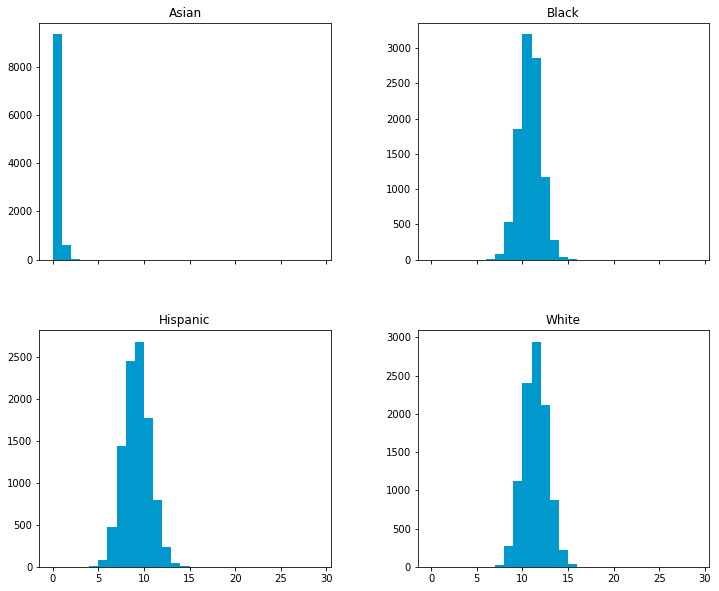


Results:

Asian        0.0648
Black       10.3033
Hispanic     8.7228
White       10.9091
dtype: float64

----------------------------------------------------------
Plurality, case 1 change: probablities = (0.4, 0.6)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:27<00:00, 41.57it/s]


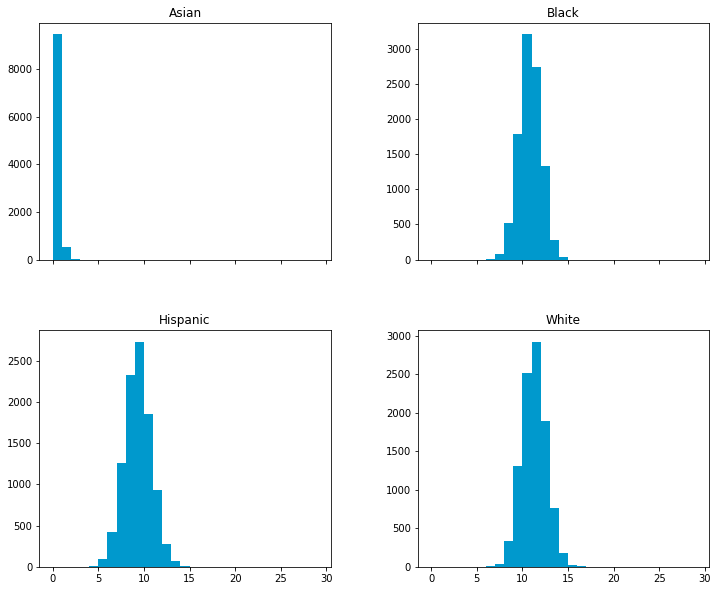


Results:

Asian        0.0560
Black       10.3323
Hispanic     8.8384
White       10.7733
dtype: float64

----------------------------------------------------------
Plurality, case 2 change: probablities = (0.15, 0.5, 0.25, 0.1)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:21<00:00, 49.69it/s]


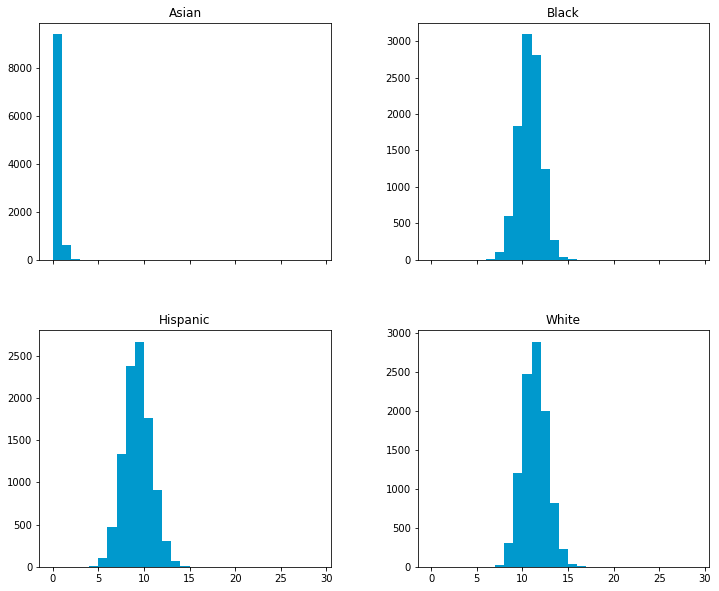


Results:

Asian        0.0609
Black       10.2868
Hispanic     8.7903
White       10.8620
dtype: float64

----------------------------------------------------------
Plurality, case 2 change: probablities = (0.2, 0.4, 0.2, 0.2)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:17<00:00, 51.26it/s]


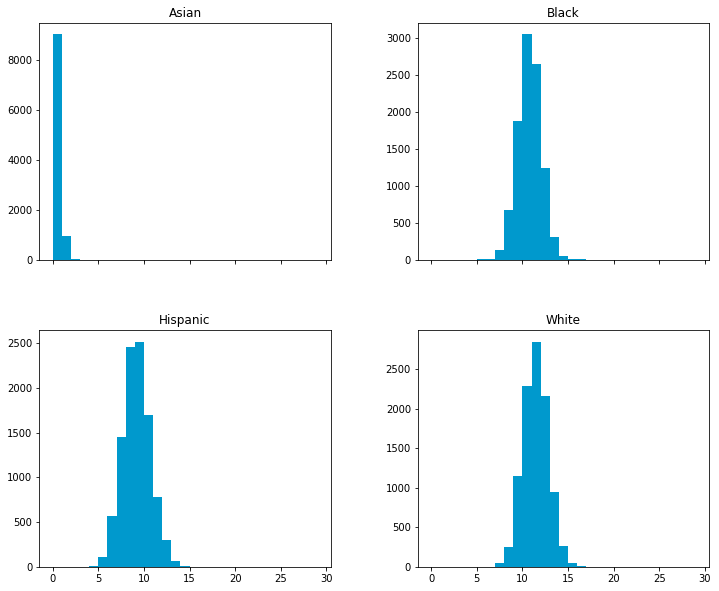


Results:

Asian        0.1011
Black       10.2585
Hispanic     8.6883
White       10.9521
dtype: float64

----------------------------------------------------------
Plurality, case 2 change: probablities = (0.1, 0.5, 0.2, 0.2)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:19<00:00, 50.11it/s]


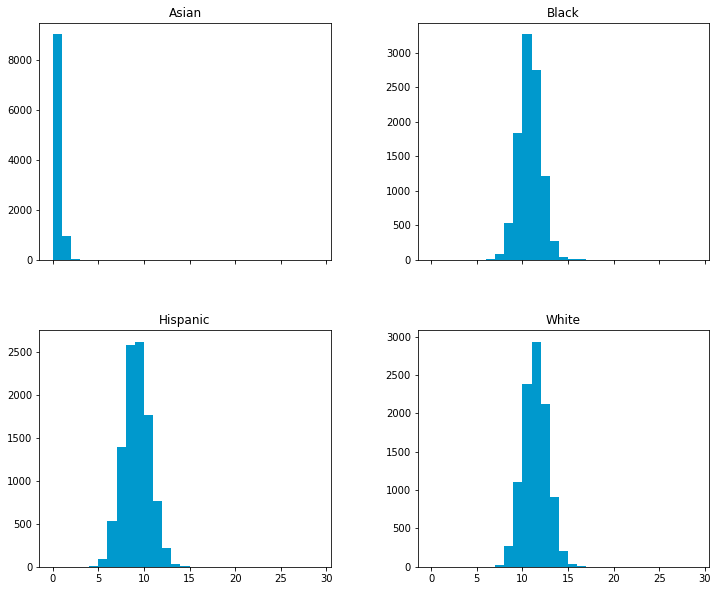


Results:

Asian        0.1012
Black       10.3017
Hispanic     8.6766
White       10.9205
dtype: float64

----------------------------------------------------------
Plurality, case 3 change: probablities = (0.1, 0.15, 0.1, 0.65)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:23<00:00, 49.26it/s]


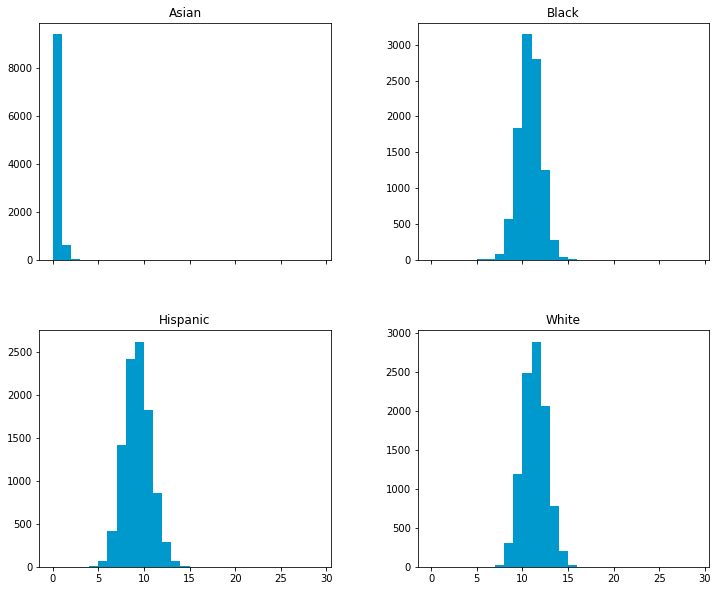


Results:

Asian        0.0614
Black       10.3101
Hispanic     8.7859
White       10.8426
dtype: float64

----------------------------------------------------------
Plurality, case 3 change: probablities = (0.05, 0.2, 0.1, 0.65)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:23<00:00, 49.11it/s]


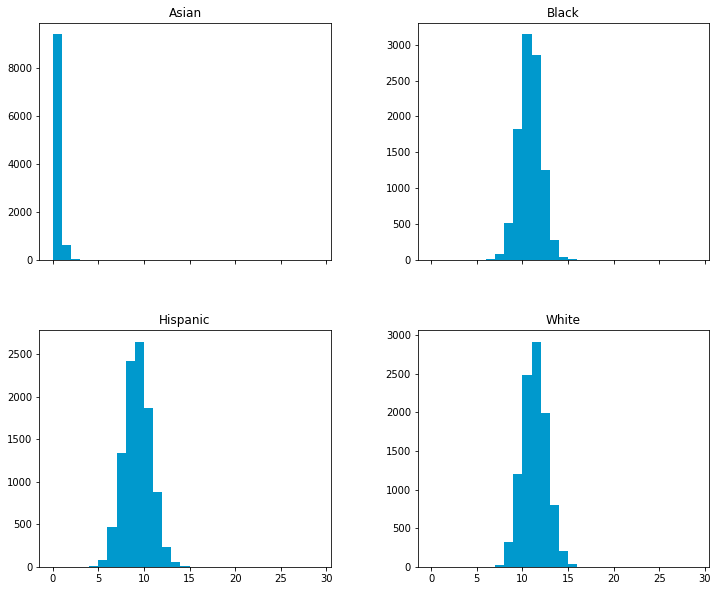


Results:

Asian        0.0619
Black       10.3243
Hispanic     8.7725
White       10.8413
dtype: float64

----------------------------------------------------------
Plurality, case 3 change: probablities = (0.05, 0.15, 0.15, 0.65)
----------------------------------------------------------


100%|██████████| 10000/10000 [03:17<00:00, 50.71it/s]


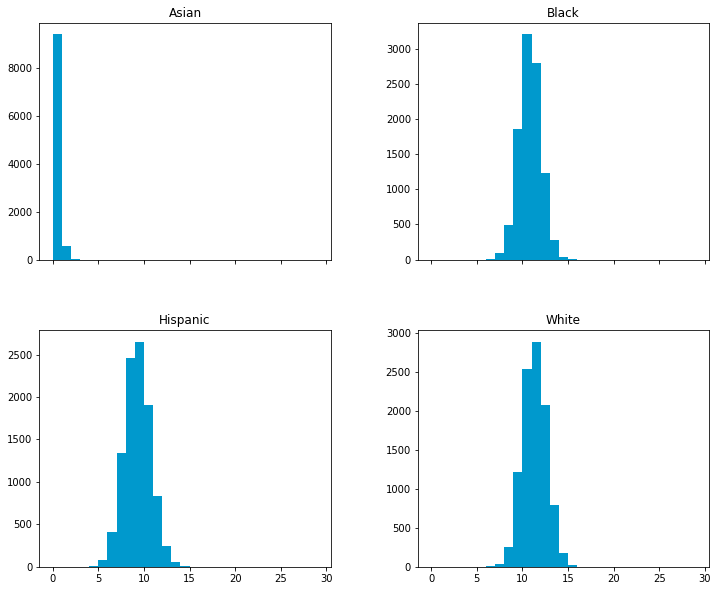


Results:

Asian        0.0602
Black       10.3101
Hispanic     8.7860
White       10.8437
dtype: float64


In [26]:
# TenByThree
print("TenByThree sensitivity analysis")
data = prec10
for sampler in tenxthree:
    # Sample
    outcomes = pandas.DataFrame.from_records(random_sample(data, num_samples, sampler))
    outcomes.groupby(groups).size()
    # Plot the results
    outcomes[groups].hist(sharex=True, grid=False, figsize=(12,10), color="#0099cd", bins=list(range(30)))
    plt.show()
    print()
    # Compute statistics for the projected outcomes
    results = outcomes.mean()
    tenxthree_results.append(results)
    print("Results:")
    print()
    print(results)

## Store the results

In [16]:
# Convert the list of series into dataframes for storage 
# and analysis, then save to CSVs
# FiftyByOne
fiftyxone_results = [df.to_frame().transpose() for df in fiftyxone_results]
df = pandas.concat(fiftyxone_results, axis=0)
df = df.reset_index().drop(['index'], axis=1)
df.index += 1
df.to_csv("./sensitivity_analysis/fifty_by_one.csv", index=False)

In [24]:
# TenByFive
tenxfive_results = [df.to_frame().transpose() for df in tenxfive_results]
df = pandas.concat(tenxfive_results, axis=0)
df = df.reset_index().drop(['index'], axis=1)
df.index += 1
df.to_csv("./sensitivity_analysis/ten_by_five.csv", index=False)

In [27]:
# TenByThree
tenxthree_results = [df.to_frame().transpose() for df in tenxthree_results]
df = pandas.concat(tenxthree_results, axis=0)
df = df.reset_index().drop(['index'], axis=1)
df.index += 1
df.to_csv("./sensitivity_analysis/ten_by_three.csv", index=False)